[Code](https://github.com/4gh/WorldBankData.jl)

[Source](https://data.worldbank.org/)

[R](https://vincentarelbundock.github.io/WDI/#/)


In [1]:
#import Pkg; Pkg.add("IMFData")
using CSV, DataFrames, DataFramesMeta, WorldBankData

wd = @__DIR__
wd = wd * "/"

"C:\\Directorio_Trabajo\\Julia\\WorldBankData/"

# Basic Examples

Get a DataFrame of the U.S. population:


In [2]:
df = wdi("SP.POP.TOTL", "HN")

Row,iso2c,country,year,SP_POP_TOTL
,String,String,Float64,Float64?
1,HN,Honduras,1960.0,2.07862e6
2,HN,Honduras,1961.0,2.13993e6
3,HN,Honduras,1962.0,2.20285e6
4,HN,Honduras,1963.0,2.26771e6
5,HN,Honduras,1964.0,2.33449e6
6,HN,Honduras,1965.0,2.40346e6
7,HN,Honduras,1966.0,2.47452e6
8,HN,Honduras,1967.0,2.5475e6
9,HN,Honduras,1968.0,2.62298e6


Get a DataFrame of the U.S. population including region data:


In [3]:
wdi("SP.POP.TOTL", "HN", 1980, 2025, extra=true)

Row,iso2c,country,year,SP_POP_TOTL,iso3c,name,region,capital,longitude,latitude,income,lending
,String,String,Float64,Float64?,String,String,String,String,Float64?,Float64?,String,String
1,HN,Honduras,1980.0,3.77799e6,HND,Honduras,Latin America & Caribbean,Tegucigalpa,-87.4667,15.1333,Lower middle income,IDA
2,HN,Honduras,1981.0,3.89574e6,HND,Honduras,Latin America & Caribbean,Tegucigalpa,-87.4667,15.1333,Lower middle income,IDA
3,HN,Honduras,1982.0,4.01565e6,HND,Honduras,Latin America & Caribbean,Tegucigalpa,-87.4667,15.1333,Lower middle income,IDA
4,HN,Honduras,1983.0,4.13778e6,HND,Honduras,Latin America & Caribbean,Tegucigalpa,-87.4667,15.1333,Lower middle income,IDA
5,HN,Honduras,1984.0,4.26192e6,HND,Honduras,Latin America & Caribbean,Tegucigalpa,-87.4667,15.1333,Lower middle income,IDA
6,HN,Honduras,1985.0,4.38769e6,HND,Honduras,Latin America & Caribbean,Tegucigalpa,-87.4667,15.1333,Lower middle income,IDA
7,HN,Honduras,1986.0,4.51557e6,HND,Honduras,Latin America & Caribbean,Tegucigalpa,-87.4667,15.1333,Lower middle income,IDA
8,HN,Honduras,1987.0,4.64573e6,HND,Honduras,Latin America & Caribbean,Tegucigalpa,-87.4667,15.1333,Lower middle income,IDA
9,HN,Honduras,1988.0,4.77811e6,HND,Honduras,Latin America & Caribbean,Tegucigalpa,-87.4667,15.1333,Lower middle income,IDA


ISO 3 letter country codes are also supported:


In [4]:
df = wdi("SP.POP.TOTL", "HND", 1980, 2012)

Row,iso2c,country,year,SP_POP_TOTL
,String,String,Float64,Float64?
1,HN,Honduras,1980.0,3.77799e6
2,HN,Honduras,1981.0,3.89574e6
3,HN,Honduras,1982.0,4.01565e6
4,HN,Honduras,1983.0,4.13778e6
5,HN,Honduras,1984.0,4.26192e6
6,HN,Honduras,1985.0,4.38769e6
7,HN,Honduras,1986.0,4.51557e6
8,HN,Honduras,1987.0,4.64573e6
9,HN,Honduras,1988.0,4.77811e6


Multiple indicators and countries can be requested:


In [5]:
df = wdi(["SP.POP.TOTL", "NY.GDP.MKTP.CD"], ["GT","SV","HN"], 1900, 2025)

Row,iso2c,country,year,SP_POP_TOTL,NY_GDP_MKTP_CD
,String,String,Float64,Float64?,Float64?
1,GT,Guatemala,1960.0,4.12888e6,1.0436e9
2,GT,Guatemala,1961.0,4.25191e6,1.0767e9
3,GT,Guatemala,1962.0,4.3786e6,1.1436e9
4,GT,Guatemala,1963.0,4.50844e6,1.2628e9
5,GT,Guatemala,1964.0,4.6408e6,1.2991e9
6,GT,Guatemala,1965.0,4.77498e6,1.3314e9
7,GT,Guatemala,1966.0,4.91079e6,1.3907e9
8,GT,Guatemala,1967.0,5.04744e6,1.4535e9
9,GT,Guatemala,1968.0,5.1841e6,1.6105e9


The data can also be returned in long format which might be more useful if many indicators are requested:


In [6]:
df = wdi(["SP.POP.TOTL", "NY.GDP.MKTP.CD"], ["GT","HN"], 1980, 2025, dflong=true)

Row,iso2c,country,year,indicator,value
,String,String,Float64,String,Float64?
1,GT,Guatemala,1980.0,SP.POP.TOTL,6.89035e6
2,GT,Guatemala,1980.0,NY.GDP.MKTP.CD,7.8787e9
3,GT,Guatemala,1981.0,SP.POP.TOTL,7.07119e6
4,GT,Guatemala,1981.0,NY.GDP.MKTP.CD,8.6075e9
5,GT,Guatemala,1982.0,SP.POP.TOTL,7.26266e6
6,GT,Guatemala,1982.0,NY.GDP.MKTP.CD,8.717e9
7,GT,Guatemala,1983.0,SP.POP.TOTL,7.46258e6
8,GT,Guatemala,1983.0,NY.GDP.MKTP.CD,9.05e9
9,GT,Guatemala,1984.0,SP.POP.TOTL,7.66986e6


Get a DataFrame of the total population for all countries:


In [7]:
df = wdi("SP.POP.TOTL", "all", 1980, 2025)

Row,iso2c,country,year,SP_POP_TOTL
,String,String,Float64,Float64?
1,1A,Arab World,1980.0,1.67707e8
2,1A,Arab World,1981.0,1.73119e8
3,1A,Arab World,1982.0,1.78588e8
4,1A,Arab World,1983.0,1.84343e8
5,1A,Arab World,1984.0,1.90162e8
6,1A,Arab World,1985.0,1.95957e8
7,1A,Arab World,1986.0,2.01917e8
8,1A,Arab World,1987.0,2.07894e8
9,1A,Arab World,1988.0,2.13455e8


# Searching

Example for country search by name


In [8]:
res=search_wdi("countries","name",r"united"i)

Row,iso3c,iso2c,name,region,capital,longitude,latitude,income,lending
,String,String,String,String,String,Float64?,Float64?,String,String
1,ARE,AE,United Arab Emirates,Middle East & North Africa,Abu Dhabi,54.3705,24.4764,High income,Not classified
2,GBR,GB,United Kingdom,Europe & Central Asia,London,-0.126236,51.5002,High income,Not classified
3,USA,US,United States,North America,Washington D.C.,-77.032,38.8895,High income,Not classified


Example for indicator search by description


In [9]:
res=search_wdi("indicators","description",r"gross national expenditure"i)
res[!, :name]

6-element Vector{String}:
 "Gross national expenditure deflator (base year varies by country)"
 "Gross national expenditure (current US\$)"
 "Gross national expenditure (current LCU)"
 "Gross national expenditure (constant 2015 US\$)"
 "Gross national expenditure (constant LCU)"
 "Gross national expenditure (% of GDP)"

Examples of country searches


In [10]:
search_wdi("countries","iso2c",r"H"i)

Row,iso3c,iso2c,name,region,capital,longitude,latitude,income,lending
,String,String,String,String,String,Float64?,Float64?,String,String
1,AFE,ZH,Africa Eastern and Southern,Aggregates,,missing,missing,Aggregates,Aggregates
2,BHR,BH,Bahrain,Middle East & North Africa,Manama,50.5354,26.1921,High income,Not classified
3,CHE,CH,Switzerland,Europe & Central Asia,Bern,7.44821,46.948,High income,Not classified
4,GHA,GH,Ghana,Sub-Saharan Africa,Accra,-0.20795,5.57045,Lower middle income,IDA
5,HKG,HK,"Hong Kong SAR, China",East Asia & Pacific,,114.109,22.3964,High income,Not classified
6,HND,HN,Honduras,Latin America & Caribbean,Tegucigalpa,-87.4667,15.1333,Lower middle income,IDA
7,HRV,HR,Croatia,Europe & Central Asia,Zagreb,15.9614,45.8069,High income,IBRD
8,HTI,HT,Haiti,Latin America & Caribbean,Port-au-Prince,-72.3288,18.5392,Lower middle income,IDA
9,HUN,HU,Hungary,Europe & Central Asia,Budapest,19.0408,47.4984,High income,Not classified


In [11]:
search_wdi("countries","income",r"upper middle"i)

Row,iso3c,iso2c,name,region,capital,longitude,latitude,income,lending
,String,String,String,String,String,Float64?,Float64?,String,String
1,ALB,AL,Albania,Europe & Central Asia,Tirane,19.8172,41.3317,Upper middle income,IBRD
2,ARG,AR,Argentina,Latin America & Caribbean,Buenos Aires,-58.4173,-34.6118,Upper middle income,IBRD
3,ARM,AM,Armenia,Europe & Central Asia,Yerevan,44.509,40.1596,Upper middle income,IBRD
4,AZE,AZ,Azerbaijan,Europe & Central Asia,Baku,49.8932,40.3834,Upper middle income,IBRD
5,BIH,BA,Bosnia and Herzegovina,Europe & Central Asia,Sarajevo,18.4214,43.8607,Upper middle income,IBRD
6,BLR,BY,Belarus,Europe & Central Asia,Minsk,27.5766,53.9678,Upper middle income,IBRD
7,BLZ,BZ,Belize,Latin America & Caribbean,Belmopan,-88.7713,17.2534,Upper middle income,Blend
8,BRA,BR,Brazil,Latin America & Caribbean,Brasilia,-47.9292,-15.7801,Upper middle income,IBRD
9,BWA,BW,Botswana,Sub-Saharan Africa,Gaborone,25.9201,-24.6544,Upper middle income,IBRD


In [12]:
search_wdi("countries","region",r"Latin America"i)

Row,iso3c,iso2c,name,region,capital,longitude,latitude,income,lending
,String,String,String,String,String,Float64?,Float64?,String,String
1,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.5167,High income,Not classified
2,ARG,AR,Argentina,Latin America & Caribbean,Buenos Aires,-58.4173,-34.6118,Upper middle income,IBRD
3,ATG,AG,Antigua and Barbuda,Latin America & Caribbean,Saint John's,-61.8456,17.1175,High income,IBRD
4,BHS,BS,"Bahamas, The",Latin America & Caribbean,Nassau,-77.339,25.0661,High income,Not classified
5,BLZ,BZ,Belize,Latin America & Caribbean,Belmopan,-88.7713,17.2534,Upper middle income,Blend
6,BOL,BO,Bolivia,Latin America & Caribbean,La Paz,-66.1936,-13.9908,Lower middle income,IBRD
7,BRA,BR,Brazil,Latin America & Caribbean,Brasilia,-47.9292,-15.7801,Upper middle income,IBRD
8,BRB,BB,Barbados,Latin America & Caribbean,Bridgetown,-59.6105,13.0935,High income,IBRD
9,CHL,CL,Chile,Latin America & Caribbean,Santiago,-70.6475,-33.475,High income,IBRD


In [13]:
search_wdi("countries","capital",r"^Ka"i)

Row,iso3c,iso2c,name,region,capital,longitude,latitude,income,lending
,String,String,String,String,String,Float64?,Float64?,String,String
1,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.5228,Low income,IDA
2,NPL,NP,Nepal,South Asia,Kathmandu,85.3157,27.6939,Lower middle income,IDA
3,UGA,UG,Uganda,Sub-Saharan Africa,Kampala,32.5729,0.314269,Low income,IDA


In [14]:
search_wdi("countries","lending",r"IBRD"i)

Row,iso3c,iso2c,name,region,capital,longitude,latitude,income,lending
,String,String,String,String,String,Float64?,Float64?,String,String
1,AGO,AO,Angola,Sub-Saharan Africa,Luanda,13.242,-8.81155,Lower middle income,IBRD
2,ALB,AL,Albania,Europe & Central Asia,Tirane,19.8172,41.3317,Upper middle income,IBRD
3,ARG,AR,Argentina,Latin America & Caribbean,Buenos Aires,-58.4173,-34.6118,Upper middle income,IBRD
4,ARM,AM,Armenia,Europe & Central Asia,Yerevan,44.509,40.1596,Upper middle income,IBRD
5,ATG,AG,Antigua and Barbuda,Latin America & Caribbean,Saint John's,-61.8456,17.1175,High income,IBRD
6,AZE,AZ,Azerbaijan,Europe & Central Asia,Baku,49.8932,40.3834,Upper middle income,IBRD
7,BGR,BG,Bulgaria,Europe & Central Asia,Sofia,23.3238,42.7105,High income,IBRD
8,BIH,BA,Bosnia and Herzegovina,Europe & Central Asia,Sarajevo,18.4214,43.8607,Upper middle income,IBRD
9,BLR,BY,Belarus,Europe & Central Asia,Minsk,27.5766,53.9678,Upper middle income,IBRD


Examples of indicator searches


In [15]:
search_wdi("indicators","name",r"gross national expenditure"i)

Row,indicator,name,description,source_database,source_organization
,String,String,String,String,String
1,NE.DAB.DEFL.ZS,Gross national expenditure deflator (base year varies by country),"Gross national expenditure (formerly domestic absorption) is the sum of household final consumption expenditure (formerly private consumption), general government final consumption expenditure (formerly general government consumption), and gross capital formation (formerly gross domestic investment).",World Development Indicators,"World Bank national accounts data, and OECD National Accounts data files."
2,NE.DAB.TOTL.CD,Gross national expenditure (current US$),"Gross national expenditure (formerly domestic absorption) is the sum of household final consumption expenditure (formerly private consumption), general government final consumption expenditure (formerly general government consumption), and gross capital formation (formerly gross domestic investment). Data are in current U.S. dollars.",World Development Indicators,"World Bank national accounts data, and OECD National Accounts data files."
3,NE.DAB.TOTL.CN,Gross national expenditure (current LCU),"Gross national expenditure (formerly domestic absorption) is the sum of household final consumption expenditure (formerly private consumption), general government final consumption expenditure (formerly general government consumption), and gross capital formation (formerly gross domestic investment). Data are in current local currency.",World Development Indicators,"World Bank national accounts data, and OECD National Accounts data files."
4,NE.DAB.TOTL.KD,Gross national expenditure (constant 2015 US$),"Gross national expenditure (formerly domestic absorption) is the sum of household final consumption expenditure (formerly private consumption), general government final consumption expenditure (formerly general government consumption), and gross capital formation (formerly gross domestic investment). Data are in constant 2015 prices, expressed in U.S. dollars.",World Development Indicators,"World Bank national accounts data, and OECD National Accounts data files."
5,NE.DAB.TOTL.KN,Gross national expenditure (constant LCU),"Gross national expenditure (formerly domestic absorption) is the sum of household final consumption expenditure (formerly private consumption), general government final consumption expenditure (formerly general government consumption), and gross capital formation (formerly gross domestic investment). Data are in constant local currency.",World Development Indicators,"World Bank national accounts data, and OECD National Accounts data files."
6,NE.DAB.TOTL.ZS,Gross national expenditure (% of GDP),"Gross national expenditure (formerly domestic absorption) is the sum of household final consumption expenditure (formerly private consumption), general government final consumption expenditure (formerly general government consumption), and gross capital formation (formerly gross domestic investment).",World Development Indicators,"World Bank national accounts data, and OECD National Accounts data files."


In [16]:
search_wdi("indicators","description",r"gross national expenditure"i)

Row,indicator,name,description,source_database,source_organization
,String,String,String,String,String
1,NE.DAB.DEFL.ZS,Gross national expenditure deflator (base year varies by country),"Gross national expenditure (formerly domestic absorption) is the sum of household final consumption expenditure (formerly private consumption), general government final consumption expenditure (formerly general government consumption), and gross capital formation (formerly gross domestic investment).",World Development Indicators,"World Bank national accounts data, and OECD National Accounts data files."
2,NE.DAB.TOTL.CD,Gross national expenditure (current US$),"Gross national expenditure (formerly domestic absorption) is the sum of household final consumption expenditure (formerly private consumption), general government final consumption expenditure (formerly general government consumption), and gross capital formation (formerly gross domestic investment). Data are in current U.S. dollars.",World Development Indicators,"World Bank national accounts data, and OECD National Accounts data files."
3,NE.DAB.TOTL.CN,Gross national expenditure (current LCU),"Gross national expenditure (formerly domestic absorption) is the sum of household final consumption expenditure (formerly private consumption), general government final consumption expenditure (formerly general government consumption), and gross capital formation (formerly gross domestic investment). Data are in current local currency.",World Development Indicators,"World Bank national accounts data, and OECD National Accounts data files."
4,NE.DAB.TOTL.KD,Gross national expenditure (constant 2015 US$),"Gross national expenditure (formerly domestic absorption) is the sum of household final consumption expenditure (formerly private consumption), general government final consumption expenditure (formerly general government consumption), and gross capital formation (formerly gross domestic investment). Data are in constant 2015 prices, expressed in U.S. dollars.",World Development Indicators,"World Bank national accounts data, and OECD National Accounts data files."
5,NE.DAB.TOTL.KN,Gross national expenditure (constant LCU),"Gross national expenditure (formerly domestic absorption) is the sum of household final consumption expenditure (formerly private consumption), general government final consumption expenditure (formerly general government consumption), and gross capital formation (formerly gross domestic investment). Data are in constant local currency.",World Development Indicators,"World Bank national accounts data, and OECD National Accounts data files."
6,NE.DAB.TOTL.ZS,Gross national expenditure (% of GDP),"Gross national expenditure (formerly domestic absorption) is the sum of household final consumption expenditure (formerly private consumption), general government final consumption expenditure (formerly general government consumption), and gross capital formation (formerly gross domestic investment).",World Development Indicators,"World Bank national accounts data, and OECD National Accounts data files."


In [17]:
search_wdi("indicators","source_database",r"Sustainable"i)

Row,indicator,name,description,source_database,source_organization
,String,String,String,String,String
1,1.1_ACCESS.ELECTRICITY.TOT,Access to electricity (% of total population),Access to electricity is the percentage of population with access to electricity.,Sustainable Energy for All,World Bank Global Electrification Database 2012
2,1.1_TOTAL.FINAL.ENERGY.CONSUM,Total final energy consumption (TFEC),Total final energy consumption (TFEC): This indicator is derived form energy balances statistics and is equivalent to total final consumption excluding non-energy use.,Sustainable Energy for All,"World Bank and International Energy Agency (IEA Statistics © OECD/IEA, http://www.iea.org/stats/index.asp)."
3,1.2_ACCESS.ELECTRICITY.RURAL,Access to electricity (% of rural population),Access to electricity is the percentage of rural population with access to electricity.,Sustainable Energy for All,World Bank Global Electrification Database 2013
4,1.3_ACCESS.ELECTRICITY.URBAN,Access to electricity (% of urban population),Access to electricity is the percentage of total population with access to electricity.,Sustainable Energy for All,World Bank Global Electrification Database 2014
5,2.1_ACCESS.CFT.TOT,Access to Clean Fuels and Technologies for cooking (% of total population),,Sustainable Energy for All,
6,2.1_SHARE.TOTAL.RE.IN.TFEC,Renewable energy consumption(% in TFEC),Renewable energy consumption(% in TFEC): Share of renewables energy in total final energy consumption,Sustainable Energy for All,"World Bank and International Energy Agency (IEA Statistics © OECD/IEA, http://www.iea.org/stats/index.asp)."
7,3.1_RE.CONSUMPTION,Renewable energy consumption (TJ),"Renewable energy consumption (TJ): This indicator includes renewable energy consumption of all technologies: hydro, modern and traditional biomass, wind, solar, liquid biofuels, biogas, geothermal, marine and waste",Sustainable Energy for All,"World Bank and International Energy Agency (IEA Statistics © OECD/IEA, http://www.iea.org/stats/index.asp)."
8,4.1.1_TOTAL.ELECTRICITY.OUTPUT,Total electricity output (GWh),Total electricity output (GWh): Total number of GWh generated by all power plants,Sustainable Energy for All,"World Bank and International Energy Agency (IEA Statistics © OECD/IEA, http://www.iea.org/stats/index.asp)."
9,4.1.2_REN.ELECTRICITY.OUTPUT,Renewable energy electricity output (GWh),"Renewable energy electricity output (GWh): Total number of GWh generated by renewable power plants, including wind, solar PV, solar thermal, hydro, marine, geothermal, biomass, renewable municipal waste, liquid biofuels and biogas. Electricity production for hydro pumpted storage is excluded.",Sustainable Energy for All,"World Bank and International Energy Agency (IEA Statistics © OECD/IEA, http://www.iea.org/stats/index.asp)."


In [18]:
search_wdi("indicators","source_organization",r"Global Partnership"i)

Row,indicator,name,description,source_database,source_organization
,String,String,String,String,String
1,2.1_PRE.PRIMARY.GER,"School enrolment, preprimary, national source (% gross)","Pre-Primary Gross Enrolment Rate (GER): The number of pupils enrolled in pre-primary school, regardless of age, expressed as a percentage of the population in the theoretical age group in pre-primary school. The purpose of this indicator is to measure the general level of participation of children in Early Childhood Education (ECE) programs. Country-specific definition, method and targets are determined by countries themselves.",Global Partnership for Education,"Data were collected from national and other publicly available sources, and validated by the Local Education Group (LEG) in each country. LEGs are typically led by the Ministry of Education and include development partners and other education stakeholders. Data were not processed or analyzed by the Global Partnership for Education. It is reported as it was presented in the original sources, or as it was communicated to us through the Coordinating Agency or Lead Donor of the LEG."
2,2.2_GIR,"Gross intake ratio in grade 1, total, national source (% of relevant age group)","Gross intake ratio (GIR): This indicator measures the total number of new entrants in the first grade of primary education, regardless of age, expressed as a percentage of the population at the official primary school-entrance age. Country-specific definition, method and targets are determined by countries themselves.",Global Partnership for Education,"Data were collected from national and other publicly available sources, and validated by the Local Education Group (LEG) in each country. LEGs are typically led by the Ministry of Education and include development partners and other education stakeholders. Data were not processed or analyzed by the Global Partnership for Education. It is reported as it was presented in the original sources, or as it was communicated to us through the Coordinating Agency or Lead Donor of the LEG."
3,2.3_GIR.GPI,Gender parity index for gross intake ratio in grade 1,"Ratio of female to male values of gross intake ratio for primary first grade. Country-specific definition, method and targets are determined by countries themselves.",Global Partnership for Education,"Data were collected from national and other publicly available sources, and validated by the Local Education Group (LEG) in each country. LEGs are typically led by the Ministry of Education and include development partners and other education stakeholders. Data were not processed or analyzed by the Global Partnership for Education. It is reported as it was presented in the original sources, or as it was communicated to us through the Coordinating Agency or Lead Donor of the LEG."
4,2.4_OOSC.RATE,"Rate of out of school children, national source (% of relevant age group)","Number of children of official primary school age who are not enrolled in primary or secondary school, expressed as a percentage of the population of official primary school age. This indicator is intended to measure the size of the population in the official primary school age range that should be targeted by policies and efforts to achieve universal primary education. Country-specific definition, method and targets are determined by countries themselves.",Global Partnership for Education,"Data were collected from national and other publicly available sources, and validated by the Local Education Group (LEG) in each country. LEGs are typically led by the Ministry of Education and include development partners and other education stakeholders. Data were not processed or analyzed by the Global Partnership for Education. It is reported as it was presented in the original sources, or as it was communicated to us through the Coordinating Agency or Lead Donor of the LEG."
5,2.5_PCR,"Primary completion rate, total, national source (% of relevant age group)","The Primary Com

# Tips and Tricks

Extracting country data from results


In [19]:
df = wdi("SP.POP.TOTL", ["US","BR"], 1980, 2012, extra=true)
us_pop = df[df[!, :iso2c] .== "US", :]

Row,iso2c,country,year,SP_POP_TOTL,iso3c,name,region,capital,longitude,latitude,income,lending
,String,String,Float64,Float64?,String,String,String,String,Float64?,Float64?,String,String
1,US,United States,1980.0,2.27225e8,USA,United States,North America,Washington D.C.,-77.032,38.8895,High income,Not classified
2,US,United States,1981.0,2.29466e8,USA,United States,North America,Washington D.C.,-77.032,38.8895,High income,Not classified
3,US,United States,1982.0,2.31664e8,USA,United States,North America,Washington D.C.,-77.032,38.8895,High income,Not classified
4,US,United States,1983.0,2.33792e8,USA,United States,North America,Washington D.C.,-77.032,38.8895,High income,Not classified
5,US,United States,1984.0,2.35825e8,USA,United States,North America,Washington D.C.,-77.032,38.8895,High income,Not classified
6,US,United States,1985.0,2.37924e8,USA,United States,North America,Washington D.C.,-77.032,38.8895,High income,Not classified
7,US,United States,1986.0,2.40133e8,USA,United States,North America,Washington D.C.,-77.032,38.8895,High income,Not classified
8,US,United States,1987.0,2.42289e8,USA,United States,North America,Washington D.C.,-77.032,38.8895,High income,Not classified
9,US,United States,1988.0,2.44499e8,USA,United States,North America,Washington D.C.,-77.032,38.8895,High income,Not classified


Year format


In [20]:
using Dates

df = wdi("AG.LND.ARBL.HA.PC", "US", 1900, 2011)
df[!, :year] = map(Date, df[!, :year])

52-element Vector{Date}:
 1960-01-01
 1961-01-01
 1962-01-01
 1963-01-01
 1964-01-01
 1965-01-01
 1966-01-01
 1967-01-01
 1968-01-01
 1969-01-01
 1970-01-01
 1971-01-01
 1972-01-01
 ⋮
 2000-01-01
 2001-01-01
 2002-01-01
 2003-01-01
 2004-01-01
 2005-01-01
 2006-01-01
 2007-01-01
 2008-01-01
 2009-01-01
 2010-01-01
 2011-01-01

Plotting


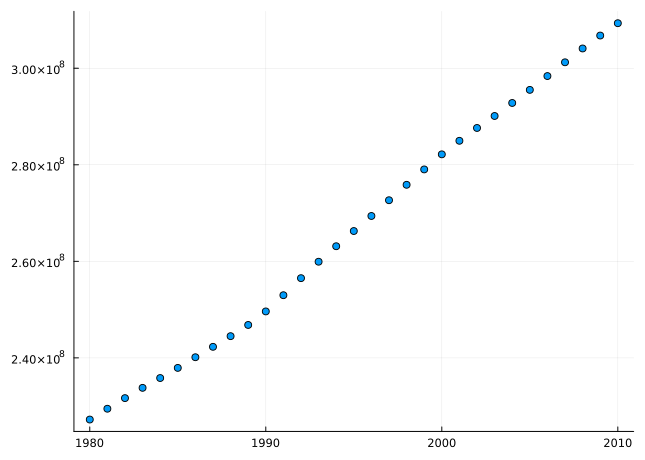

In [21]:
using StatsPlots

df = wdi("SP.POP.TOTL", "US", 1980, 2010)

@df df scatter(:year, :SP_POP_TOTL,label=false)

Empty/Missing results


In [22]:
df = wdi("EN.ATM.CO2E.KT", "AS")
df = wdi("EN.ATM.CO2E.KT", ["AS","US"])

Row,iso2c,country,year,EN_ATM_CO2E_KT
,String,String,Float64,Float64?
1,AS,American Samoa,1960.0,missing
2,AS,American Samoa,1961.0,missing
3,AS,American Samoa,1962.0,missing
4,AS,American Samoa,1963.0,missing
5,AS,American Samoa,1964.0,missing
6,AS,American Samoa,1965.0,missing
7,AS,American Samoa,1966.0,missing
8,AS,American Samoa,1967.0,missing
9,AS,American Samoa,1968.0,missing


# Cache


In [23]:
using WorldBankData
using DataFrames
using CSV
CSV.write(wd * "country_cache.csv",WorldBankData.get_countries())
CSV.write(wd * "indicator_cache.csv", WorldBankData.get_indicators())

"C:\\Directorio_Trabajo\\Julia\\WorldBankData/indicator_cache.csv"

In [24]:
using WorldBankData
using DataFrames
WorldBankData.set_country_cache(CSV.read(wd * "country_cache.csv",DataFrame))

Row,iso3c,iso2c,name,region,capital,longitude,latitude,income,lending
,String3,String3,String,String31,String31?,Float64?,Float64?,String31,String15
1,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.5167,High income,Not classified
2,AFE,ZH,Africa Eastern and Southern,Aggregates,missing,missing,missing,Aggregates,Aggregates
3,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.5228,Low income,IDA
4,AFR,A9,Africa,Aggregates,missing,missing,missing,Aggregates,Aggregates
5,AFW,ZI,Africa Western and Central,Aggregates,missing,missing,missing,Aggregates,Aggregates
6,AGO,AO,Angola,Sub-Saharan Africa,Luanda,13.242,-8.81155,Lower middle income,IBRD
7,ALB,AL,Albania,Europe & Central Asia,Tirane,19.8172,41.3317,Upper middle income,IBRD
8,AND,AD,Andorra,Europe & Central Asia,Andorra la Vella,1.5218,42.5075,High income,Not classified
9,ARB,1A,Arab World,Aggregates,missing,missing,missing,Aggregates,Aggregates


In [25]:
WorldBankData.set_indicator_cache(CSV.read(wd * "indicator_cache.csv",DataFrame))

Row,indicator,name,description,source_database,source_organization
,String,String,String?,String,String?
1,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day),The poverty headcount index measures the proportion of the population with daily per capita income (in 2011 PPP) below the poverty line.,LAC Equity Lab,LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).
2,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day),The poverty headcount index measures the proportion of the population with daily per capita income (in 2005 PPP) below the poverty line.,LAC Equity Lab,LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).
3,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount,The poverty headcount index measures the proportion of the population with daily per capita income (in 2005 PPP) below the poverty line.,LAC Equity Lab,LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).
4,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National,The poverty headcount index measures the proportion of the population with daily per capita income below the official poverty line developed by each country.,LAC Equity Lab,LAC Equity Lab tabulations of data from National Statistical Offices.
5,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day),The poverty headcount index measures the proportion of the population with daily per capita income (in 2005 PPP) below the poverty line.,LAC Equity Lab,LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).
6,1.0.HCount.Vul4to10,Vulnerable ($4-10 a day) Headcount,The poverty headcount index measures the proportion of the population with daily per capita income (in 2005 PPP) below the poverty line.,LAC Equity Lab,LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).
7,1.0.PGap.1.90usd,Poverty Gap ($1.90 a day),The poverty gap captures the mean aggregate income or consumption shortfall relative to the poverty line across the entire population. It measures the total resources needed to bring all the poor to the level of the poverty line (averaged over the total population).,LAC Equity Lab,LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).
8,1.0.PGap.2.5usd,Poverty Gap ($2.50 a day),The poverty gap captures the mean aggregate income or consumption shortfall relative to the poverty line across the entire population. It measures the total resources needed to bring all the poor to the level of the poverty line (averaged over the total population).,LAC Equity Lab,LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).
9,1.0.PGap.Poor4uds,Poverty Gap ($4 a day),The poverty gap captures the mean aggregate income or consumption shortfall relative to the poverty line across the entire population. It measures the total resources needed to bring all the poor to the level of the poverty line (averaged over the total population).,LAC Equity Lab,LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).


In [26]:
using WorldBankData
using DataFrames
using CSV

function update_us_pop_totl()
    df = wdi("SP.POP.TOTL", "US")
    CSV.write(wd * "us_pop_totl.csv",df)
end
update_us_pop_totl()
df = CSV.read(wd * "us_pop_totl.csv",DataFrame)

Row,iso2c,country,year,SP_POP_TOTL
,String3,String15,Float64,Float64
1,US,United States,1960.0,1.80671e8
2,US,United States,1961.0,1.83691e8
3,US,United States,1962.0,1.86538e8
4,US,United States,1963.0,1.89242e8
5,US,United States,1964.0,1.91889e8
6,US,United States,1965.0,1.94303e8
7,US,United States,1966.0,1.9656e8
8,US,United States,1967.0,1.98712e8
9,US,United States,1968.0,2.00706e8
